###  Comparison of accuracy scores across different feature selection methods in three experiments using the dataset

Comparison of accuracy scores across different feature selection methods in three
experiments using the dataset


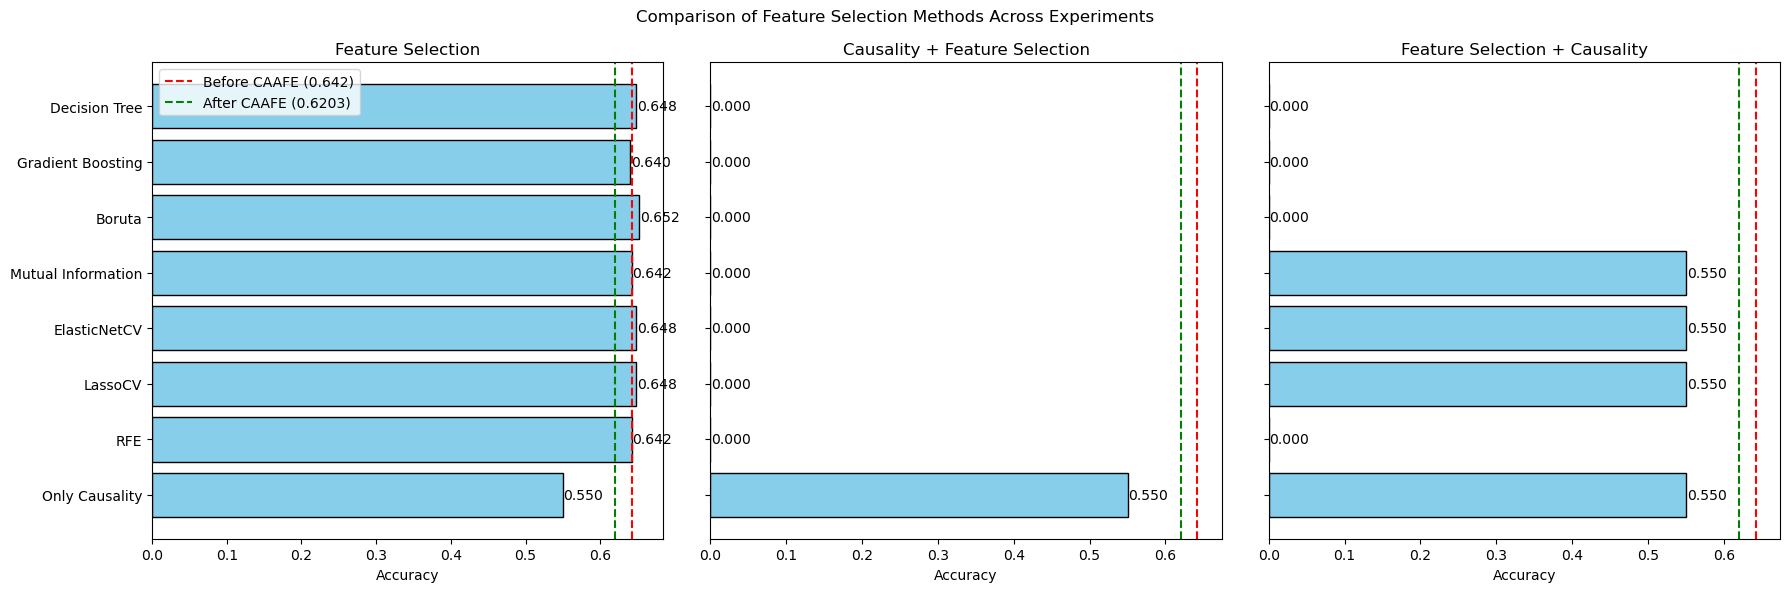

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Updated data for experiments with actual accuracies and method details
experiments = [
    ("Feature Selection", {
                "Only Causality": 0.55,  
        "RFE": 0.642,
        "LassoCV": 0.648,
        "ElasticNetCV": 0.648,
        "Mutual Information": 0.642,
        "Boruta": 0.652,
        "Gradient Boosting": 0.64,
        "Decision Tree": 0.648,
    }),
    ("Causality + Feature Selection", {
        "Only Causality": 0.55,  
        "RFE": 0,  
        "LassoCV": 0,
        "ElasticNetCV": 0,
        "Mutual Information": 0,
        "Boruta": 0,  
        "Gradient Boosting": 0,  
        "Decision Tree": 0,
    }),
    ("Feature Selection + Causality", {
                "Only Causality": 0.55,  
        "RFE": 0,
        "LassoCV": 0.55,
        "ElasticNetCV": 0.55,
        "Mutual Information": 0.55,
        "Boruta": 0,
        "Gradient Boosting": 0,
        "Decision Tree": 0,
    })
]



# Accuracy before and after CAAFE
accuracy_before_caaafe = 0.642
accuracy_after_caaafe =  0.6203  

# Plotting each experiment
fig, axes = plt.subplots(1, len(experiments), figsize=(18, 6), sharey=True)
fig.suptitle("Comparison of Feature Selection Methods Across Experiments")

for ax, (experiment_name, results) in zip(axes, experiments):
    methods = list(results.keys())
    accuracies = list(results.values())

    ax.barh(methods, accuracies, color='skyblue', edgecolor='black')
    ax.set_xlabel("Accuracy")
    ax.set_title(experiment_name)
    ax.axvline(accuracy_before_caaafe, color='red', linestyle="--", label="Before CAAFE (0.642)")
    ax.axvline(accuracy_after_caaafe, color='green', linestyle="--", label="After CAAFE (0.6203)")

    for i, v in enumerate(accuracies):
        ax.text(v + 0.001, i, f"{v:.3f}", va='center')
print("""Comparison of accuracy scores across different feature selection methods in three
experiments using the dataset""")
axes[0].legend()
plt.tight_layout()
plt.show()


### The average accuracy across three different experiments

The average accuracy across three different experiments conducted on the dataset


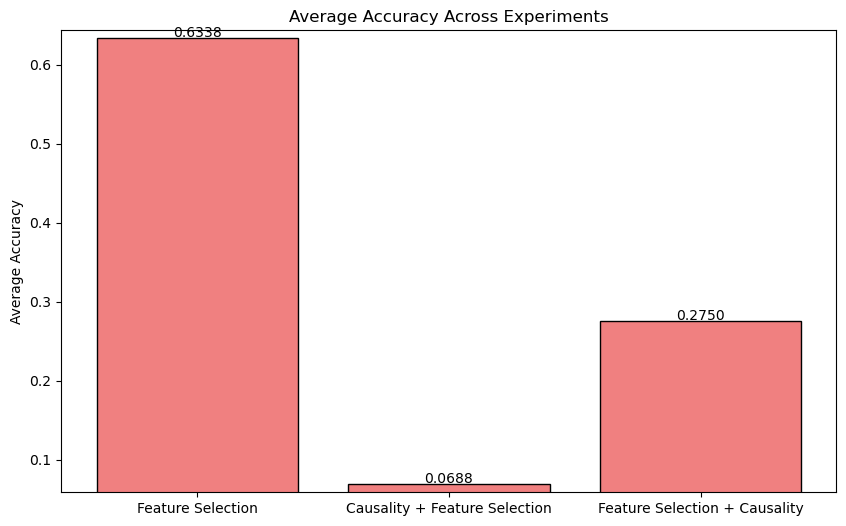

In [8]:
# Calculate average accuracy for each experiment
average_accuracies = [np.mean(list(exp[1].values())) for exp in experiments]
experiment_names = [exp[0] for exp in experiments]

# Plot the average accuracy per experiment
plt.figure(figsize=(10, 6))
plt.bar(experiment_names, average_accuracies, color='lightcoral', edgecolor='black')
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy Across Experiments")

# Add value labels
for i, v in enumerate(average_accuracies):
    plt.text(i, v + 0.002, f"{v:.4f}", ha='center')
print("The average accuracy across three different experiments conducted on the dataset")

plt.ylim(min(average_accuracies) - 0.01, max(average_accuracies) + 0.01)
plt.show()


### The number of features selected using different methods

The three panels from left to right illustrate the number of features selected in the
dataset, using different methods: the first panel shows feature selection only, the second combines
causality analysis with feature selection, and the third applies feature selection followed by
causality analysis


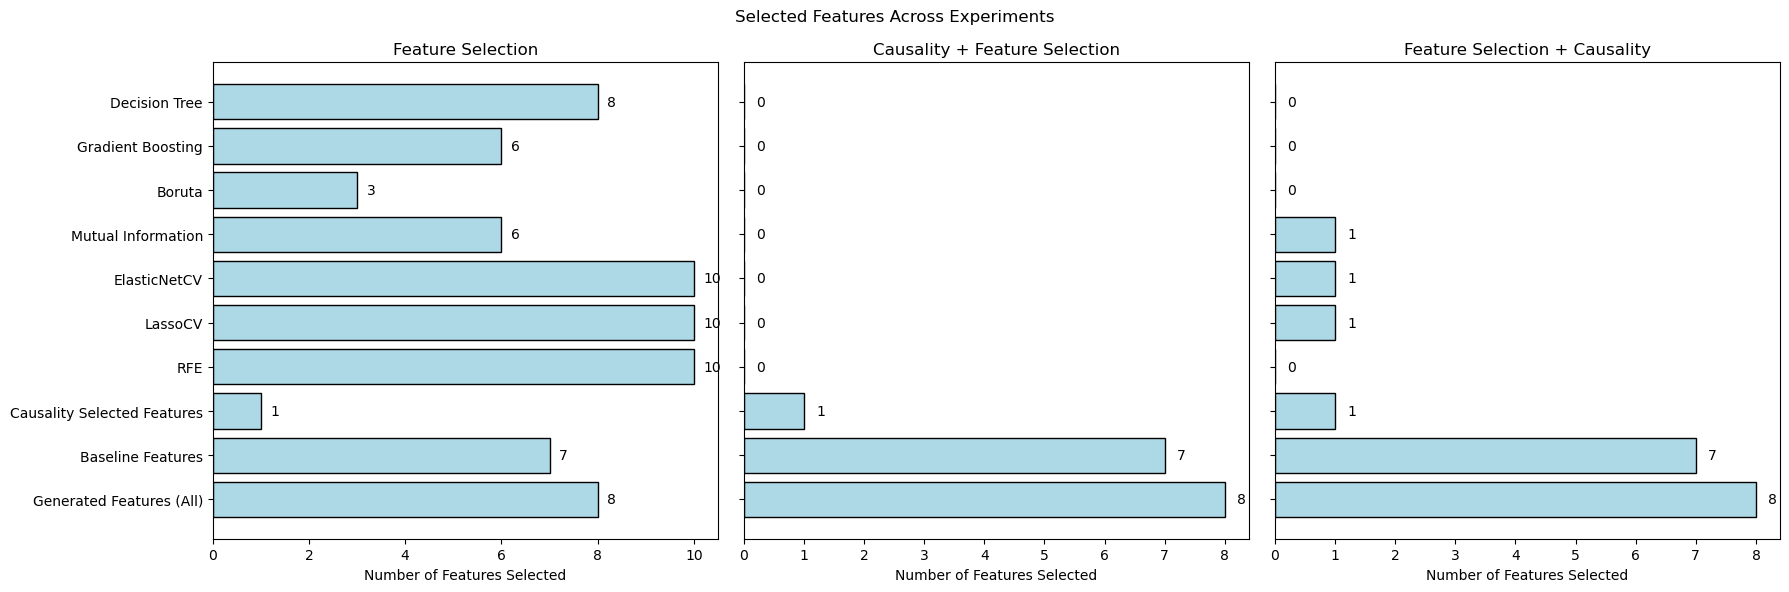

In [3]:
# Data for selected features in each method for each experiment
feature_selection_methods = [
    "RFE", "LassoCV", "ElasticNetCV", "Mutual Information", "Boruta", "Gradient Boosting", "Decision Tree", "CAAFE"
]
# Define the updated structure for experiments and their respective selected features
selected_features = {
    "Feature Selection": {
        "Generated Features (All)": ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'combined_airport'],
        "Baseline Features": ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length'],
        "Causality Selected Features": ['Time_of_Day'],
        "RFE": ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'Time', 'Length', 'TotalTimeOfWeek', 'FlightDurationRatio', 'AirportTraffic', 'combined_airport'],
        "LassoCV": ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'combined_airport', 'week', 'Time_of_Day'],
        "ElasticNetCV": ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'combined_airport', 'week', 'Time_of_Day'],
        "Mutual Information": ['Airline', 'AirportFrom', 'TotalTimeOfWeek', 'FlightDurationRatio', 'combined_airport', 'Time_of_Day'],
        "Boruta": ['Airline', 'Time', 'FlightDurationRatio'],
        "Gradient Boosting": ['Airline', 'Flight', 'Time', 'TotalTimeOfWeek', 'FlightDurationRatio', 'combined_airport'],
        "Decision Tree": ['Airline', 'Flight', 'AirportTo', 'Time', 'Length', 'TotalTimeOfWeek', 'FlightDurationRatio', 'combined_airport']
    },
    "Causality + Feature Selection": {
         "Generated Features (All)": ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'combined_airport'],
        "Baseline Features": ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length'],
        "Causality Selected Features": ['Time_of_Day'],
        "RFE": [],
        "LassoCV": [],
        "ElasticNetCV": [],
        "Mutual Information": [],
        "Boruta": [],
        "Gradient Boosting": [],
        "Decision Tree": []
    },
    "Feature Selection + Causality": {
         "Generated Features (All)": ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'combined_airport'],
        "Baseline Features": ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length'],
        "Causality Selected Features": ['Time_of_Day'],
        "RFE": [],
        "LassoCV": ['Time_of_Day'],
        "ElasticNetCV": ['Time_of_Day'],
        "Mutual Information": ['Time_of_Day'],
        "Boruta": [],
        "Gradient Boosting": [],
        "Decision Tree": []
    }
}




# Plot feature selection methods and selected features for each experiment
fig, axes = plt.subplots(1, len(selected_features), figsize=(18, 6), sharey=True)
fig.suptitle("Selected Features Across Experiments")

for ax, (experiment_name, method_features) in zip(axes, selected_features.items()):
    method_names = list(method_features.keys())
    num_features = [len(features) for features in method_features.values()]

    ax.barh(method_names, num_features, color='lightblue', edgecolor='black')
    ax.set_xlabel("Number of Features Selected")
    ax.set_title(experiment_name)

    for i, v in enumerate(num_features):
        ax.text(v + 0.2, i, str(v), va='center')
print("""The three panels from left to right illustrate the number of features selected in the
dataset, using different methods: the first panel shows feature selection only, the second combines
causality analysis with feature selection, and the third applies feature selection followed by
causality analysis""")
plt.tight_layout()
plt.show()


### Results of various feature selection methods applied to the datase

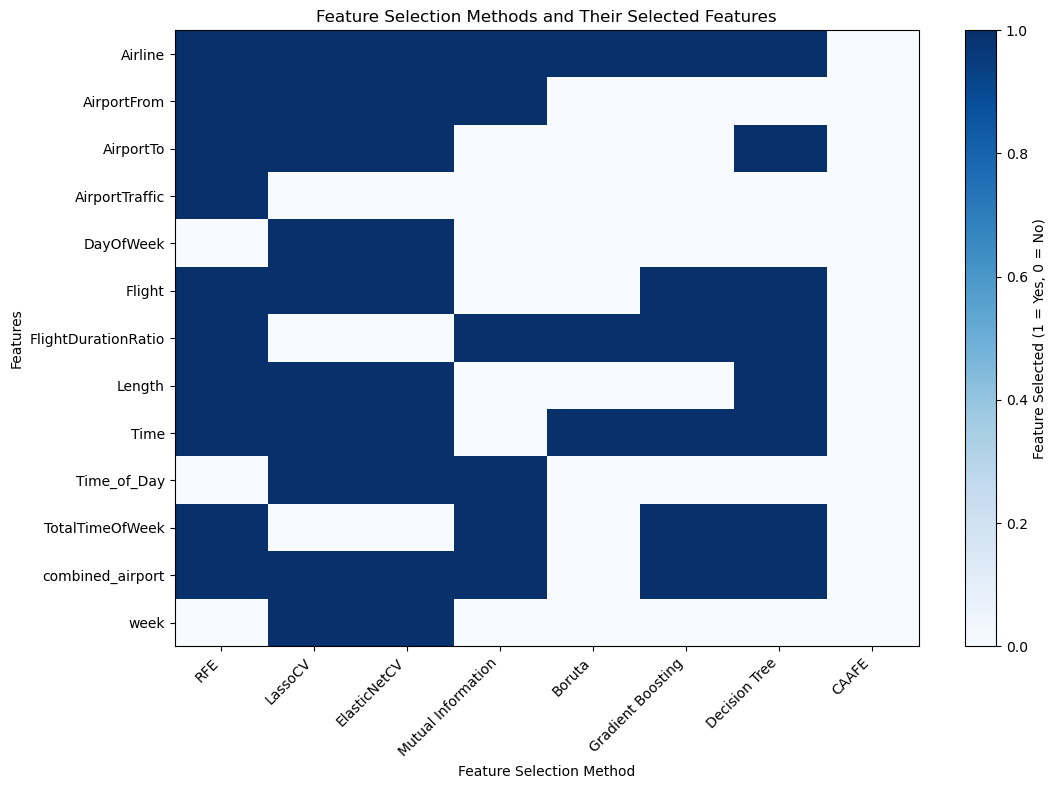

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define all unique features across all experiments
all_features = sorted(set(
    feature for experiment in selected_features.values()
    for method in experiment.values()
    for feature in method
))

# Define all methods used
all_methods = feature_selection_methods

# Create a binary matrix indicating which features were selected by each method
feature_matrix = np.zeros((len(all_features), len(all_methods)))

# Populate the matrix
for method_idx, method_name in enumerate(all_methods):
    for experiment in selected_features.values():
        selected = experiment.get(method_name, [])
        for feat_idx, feature in enumerate(all_features):
            if feature in selected:
                feature_matrix[feat_idx, method_idx] = 1

# Plot heatmap
plt.figure(figsize=(12, 8))
plt.imshow(feature_matrix, cmap="Blues", aspect="auto")

# Configure axis labels
plt.xticks(ticks=np.arange(len(all_methods)), labels=all_methods, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(all_features)), labels=all_features)

plt.xlabel("Feature Selection Method")
plt.ylabel("Features")
plt.title("Feature Selection Methods and Their Selected Features")
plt.colorbar(label="Feature Selected (1 = Yes, 0 = No)")

plt.show()


Results of various feature selection methods applied to the datase


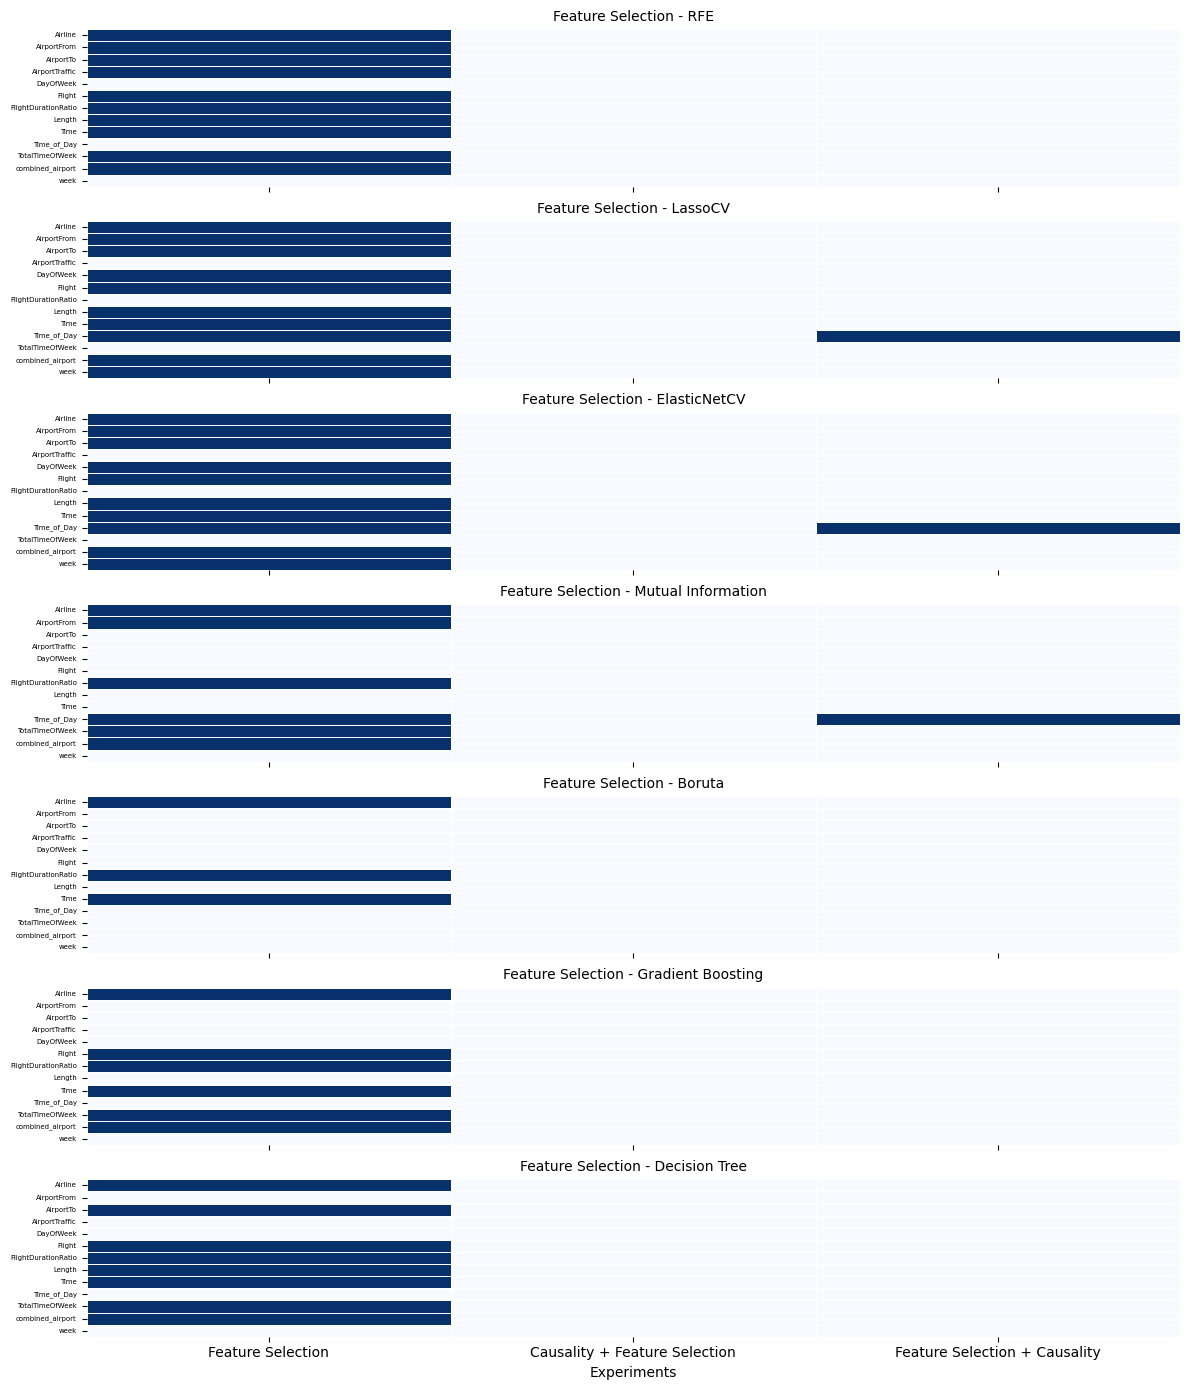

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define all unique features across all experiments
all_features = sorted(set(
    feature for experiment in selected_features.values()
    for method in experiment.values()
    for feature in method
))

# Define all methods used
methods = ["RFE", "LassoCV", "ElasticNetCV", "Mutual Information", "Boruta", "Gradient Boosting", "Decision Tree"]
experiments = list(selected_features.keys())

# Create separate heatmaps for each feature selection method
num_methods = len(methods)
fig, axes = plt.subplots(nrows=num_methods, figsize=(12, 2 * num_methods), sharex=True)

for i, method_name in enumerate(methods):
    # Create a heatmap data matrix for the current method
    heatmap_data = np.zeros((len(all_features), len(experiments)))

    for exp_idx, exp_name in enumerate(experiments):
        method_dict = selected_features.get(exp_name, {})
        selected = method_dict.get(method_name, [])

        # Ensure selected is a list before iterating
        if not isinstance(selected, list):
            selected = []

        for feat_idx, feature in enumerate(all_features):
            if feature in selected:
                heatmap_data[feat_idx, exp_idx] = 1

    # Plot heatmap for the current method
    sns.heatmap(heatmap_data, cmap="Blues", xticklabels=experiments, yticklabels=all_features, linewidths=0.5,
                cbar=False, ax=axes[i])

    # Adjust text size
    axes[i].set_title(f"Feature Selection - {method_name}", fontsize=10)  # Smaller title
    axes[i].tick_params(axis='y', labelsize=5)  # Smaller y-axis labels
    axes[i].tick_params(axis='x', labelsize=10)  # Smaller x-axis labels
print("Results of various feature selection methods applied to the datase")

plt.xlabel("Experiments", fontsize=10)
plt.tight_layout()
plt.show()
